In [2]:
import torch
import framework.nn_fw as nn 
import framework.train_test_fw as tt
from visualization import *
from tqdm.notebook import tqdm
from generate_data import *
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

Generate Data as instructed in task

In [3]:
data = generate_disc_set(2_000, split=.5, one_hot_labels=False)

In [3]:
model = nn.Sequential
architecture = (nn.Linear(2, 25), nn.Tanh(), nn.Linear(25, 25), nn.ReLU(), nn.Linear(25, 1), nn.ReLU())

In [4]:
tt.run_analysis(model, architecture, data, 25, 50_000, device, batch_size=1000, lr = .0001)

  0%|          | 0/25 [00:00<?, ?it/s]

KeyboardInterrupt: 

Sanity check for the data set.

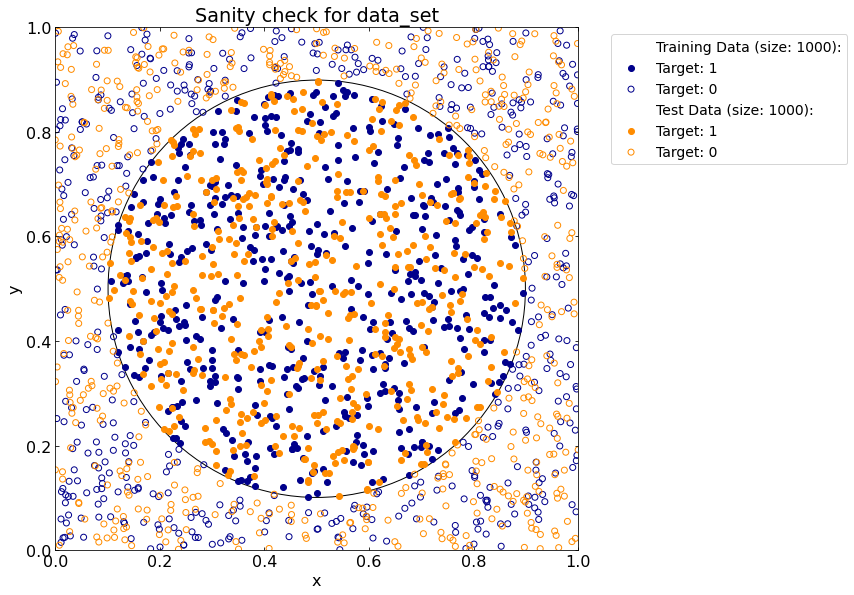

In [5]:
plot_data(data)

In [4]:
input, target, *_ = data
architecture = (nn.Linear(2, 25), nn.Tanh(), nn.Linear(25, 25), nn.ReLU(), nn.Linear(25, 1), nn.ReLU())
model = nn.Sequential(*architecture)


NameError: name 'nb' is not defined

Testing wether train a

In [5]:
#input = torch.rand(100, 2)
#target = torch.tensor([0 for _ in range(100)])
output = model(input)
loss = nn.MSE(target)
print(output.shape)
print(loss(output))
print(tt.compute_nb_errors(output, target))
epochs= 50_000

for i in tqdm(range(epochs)):
    output = model(input)
    optim = nn.SGD(.0001, input.shape[0])
    loss = nn.MSE(target)
    grads = model.backward(loss)
    train_accuracy = 1-tt.compute_nb_errors(output, target)/input.shape[0]
    print('Epoch: ', i, '/', epochs, ', Accuracy(Training): ({:.3f}%)'.format(
                100. * train_accuracy),'nb_errors:', tt.compute_nb_errors(output, target),end='\r')

    model.update(optim)

print(loss(output))
print(tt.compute_nb_errors(output, target))
print(1-tt.compute_nb_errors(output, target)/input.shape[0])


NameError: name 'model' is not defined

In [10]:
print(torch.cat((torch.round(output), target), 1))
print((abs(torch.round(output) - target)).sum())

tensor([[1., 0., 1.],
        [0., 0., 1.],
        [0., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])
tensor(1020.)
